In [72]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import gzip
import healpy as hp

from QE_tau import *
from AlTau import GetAlTau

from cosmojo.universe import Cosmo
from cosmojo.utils import nl_cmb, bl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
cosmo = Cosmo()

In [7]:
cltt = cosmo.cmb_spectra(5000)[:,0]

In [4]:
def GetClTauTau(A_tau=1, L_C=130,lmax=500):
    L = np.arange(lmax+1,dtype=np.float32)
    return (A_tau/1e4) * 4.*np.pi /L_C**2 * np.exp(-(L/L_C)**2)

## Maps

In [5]:
tau_map = hp.synfast(GetClTauTau(lmax=5000), 2048, pixwin=0)

/Users/fbianchini/anaconda/lib/python2.7/site-packages/healpy/sphtfunc.py:296: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning)


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [9]:
tt_map = hp.synfast(cltt, 2048, pixwin=0)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [10]:
tt_tau_map = np.exp(-tau_map)*tt_map

## Estimate $\tau$

In [19]:
tau_estimate = GetTauMap(tt_tau_map, cltt, np.zeros_like(cltt), lmax=3000)

QE_tau.py:19: RuntimeWarning: invalid value encountered in divide
  return hp.alm2map(alm1, nside, lmax=lmax, mmax=mmax, pixwin=pixwin, fwhm=fwhm) * hp.alm2map(alm2, nside, lmax=lmax, mmax=mmax, pixwin=pixwin, fwhm=fwhm)
QE_tau.py:20: RuntimeWarning: divide by zero encountered in divide
  


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


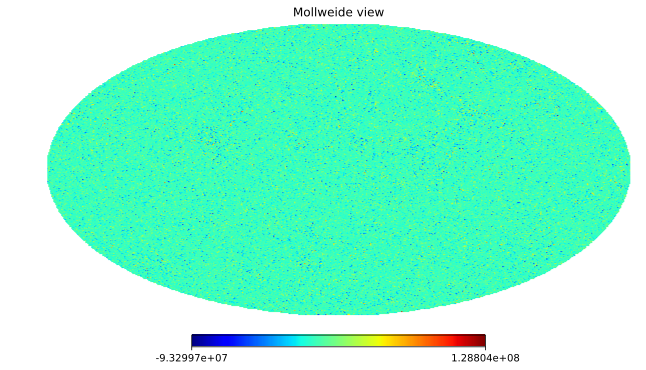

In [20]:
hp.mollview(tau_estimate)

In [21]:
tau_estimate

array([ 39464521.53297448,   6055815.39168087,  19359117.43702135, ...,
        -9193873.3868983 ,  25552882.62092173,  15059656.71084427])

In [105]:
cl_tau_bar = hp.anafast(tau_estimate,lmax=3000)
print('done')
cl_tau = hp.anafast(tau_map,lmax=3000)
print('done')

done
done


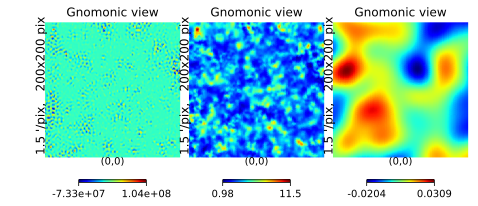

In [164]:
hp.gnomview(tau_estimate, sub=(131))
hp.gnomview(tau_estimate_filtered, sub=(132))#, min=-0.0204, max=0.0309)
hp.gnomview(tau_map, sub=(133))

In [26]:
tau_alm = hp.map2alm(tau_estimate,lmax=3000)

In [143]:
tau_alm_1000 = hp.map2alm(tau_estimate,lmax=1000)

In [31]:
Al_tau_inv = GetAlTau(cltt,np.zeros_like(cltt),3000)

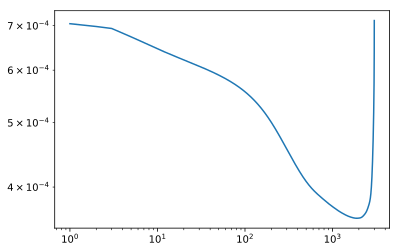

In [45]:
plt.loglog(1./Al_tau_inv)
# np.savetxt('Al_tau.dat', np.c_[np.arange(3001),1./Al_tau_inv])

In [163]:
tau_estimate_filtered = hp.alm2map(hp.almxfl(tau_alm,1./Al_tau_inv_new2), 2048, lmax=3000)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [49]:
180./np.rad2deg(1./cosmo.k_NL(0.08)/cosmo.d_A(0.08))

194.53470056987138

In [50]:
from camb.bispectrum import threej

In [51]:
import wignercoupling as wc

In [65]:
%timeit threej(3,0,0,0)

The slowest run took 4.20 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 19.8 µs per loop


In [134]:
threej(3,2,0,0)

array([-0.29277002, -0.        ,  0.19518001,  0.        , -0.20806259])

In [66]:
%timeit wc.wigner3j_vect(3*2,2*0,0.,0.)

The slowest run took 6.31 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 22.2 µs per loop


In [93]:
%timeit Al_tau_inv_new = GetAlTau(cltt,np.zeros_like(cltt),1000)

1 loop, best of 3: 42.8 s per loop


In [154]:
Al_tau_inv_new2 = GetAlTau(cltt,np.zeros_like(cltt),3000)

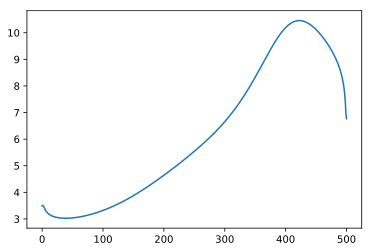

In [136]:
plt.plot(Al_tau_inv_new/Al_tau_inv[:501])
# plt.plot(Al_tau_inv[:101],'--')

In [74]:
cltt

array([ 1.        ,  0.99999962,  0.99999886, ...,  0.17997028,
        0.1797645 ,  0.17955889])

(1000, 1000000)

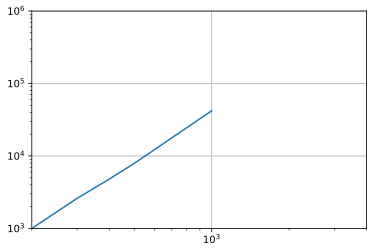

In [99]:
plt.loglog([200,300,400,500,1000], [1000,2600,4800,7900,42000])
plt.grid()
plt.xlim(200,4000)
plt.ylim(1000,1000000)

In [101]:
5e5/60/60

138.88888888888889

/Users/fbianchini/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide


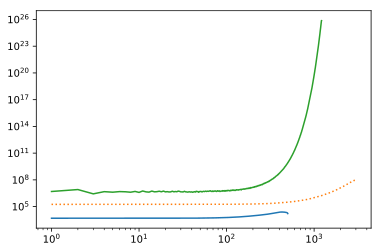

In [159]:
plt.plot(Al_tau_inv_new)
plt.plot(Al_tau_inv_new2, ":")
# plt.plot(Al_tau_inv,'--')
plt.loglog(1./np.sqrt(GetClTauTau(lmax=3000)/cl_tau_bar))

In [114]:
cl_tau_estimate_filtered = hp.anafast(tau_estimate_filtered, lmax=500)

In [123]:
cl_tau_input = hp.anafast(tau_map, lmax=500)

(0, 500)

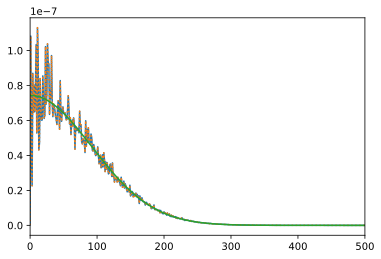

In [124]:
plt.plot(cl_tau_estimate_filtered)
plt.plot(cl_tau_input, ':')
plt.plot(GetClTauTau(lmax=5000))
plt.xlim(0,500)

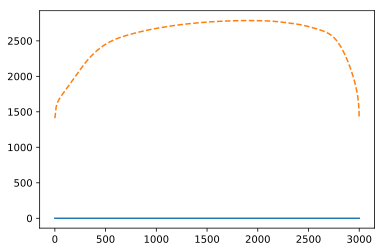

In [132]:
# plt.plot(cl_tau_estimate_filtered/cl_tau_input)
plt.plot(np.sqrt(GetClTauTau(lmax=3000)/cl_tau_bar))
plt.plot(Al_tau_inv,'--')

In [130]:
Al_tau_inv

array([ 1428.28930861,  1418.65988358,  1432.50889744, ...,  1495.30347634,
        1433.44341388,  1403.36949863])

In [151]:
myfilt = np.zeros(3001)
myfilt[:101] = 1./Al_tau_inv_new2[:101]

/Users/fbianchini/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


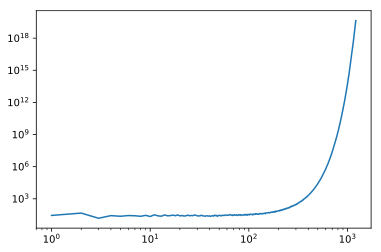

In [168]:
plt.loglog(1./np.sqrt(GetClTauTau(lmax=3000)/cl_tau_bar)/Al_tau_inv_new2)